In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [73]:
df_hosp = pd.read_excel('HospitalDatabase.xlsx',sheet_name = None) 

In [199]:
re_adm=df_hosp['ReAdmissionRegistry']
amb_visits=df_hosp['AmbulatoryVisits']


### 1.Replace all the null values in ReadmissionFlag with 0.


In [75]:
re_adm["ReadmissionFlag"]=re_adm["ReadmissionFlag"].fillna(0)
re_adm


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


### 2.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [243]:
user = input(" ReasonForVisit  : ")
userData = EDVisits.query("ReasonForVisit == @user")
Result = userData['PatientID'].count()
Result


 ReasonForVisit  : Migraine


156

### 3. Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

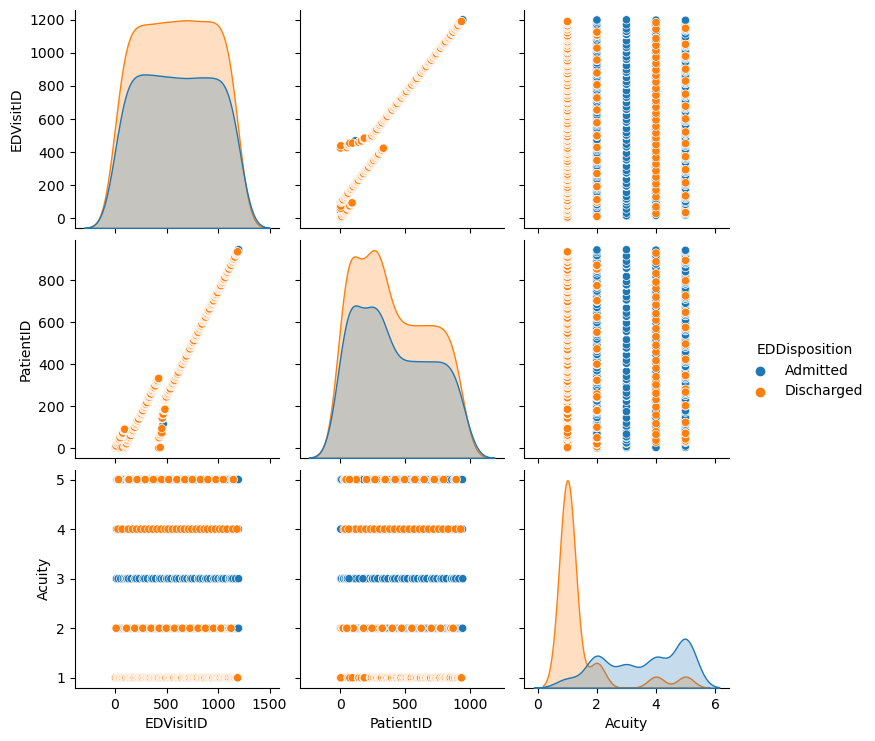

In [240]:
sns.pairplot(EDVisits, hue="EDDisposition")

### 4.Find the count of Spanish Speaking patients.

In [200]:
Spanish_count = pats[pats['Language'] == 'Spanish']['PatientID'].count()
print("Count of Spanish Speaking >> " + str(Spanish_count))



Count of Spanish Speaking >> 110


### 5.Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)

### 6.Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [147]:
expLOS=pd.merge(pats,discharges,on='PatientID')
expLOS=expLOS[(expLOS['ExpectedLOS']> float(input("Enter a number")))]
expLOS[['FirstName','LastName','ExpectedLOS']]


Enter a number10


,FirstName,LastName,ExpectedLOS
4,Jerrilyn,Kane,13.650953
6,Alexandra,Green,16.472257
8,Granny,Man,14.787084
9,Dean,Kimberly,12.081905
12,Gan,Yu,10.547415
...,...,...,...
708,Ermentrude,Hacard,15.435455
710,Larissa,Gillam,13.323413
714,Myrah,Hegley,10.563688
715,Konopelski,Group,13.725405



### 7.Create a bar chart between expectedLOS & Primary diagnosis.

Text(0, 0.5, 'Primary diagonsis')

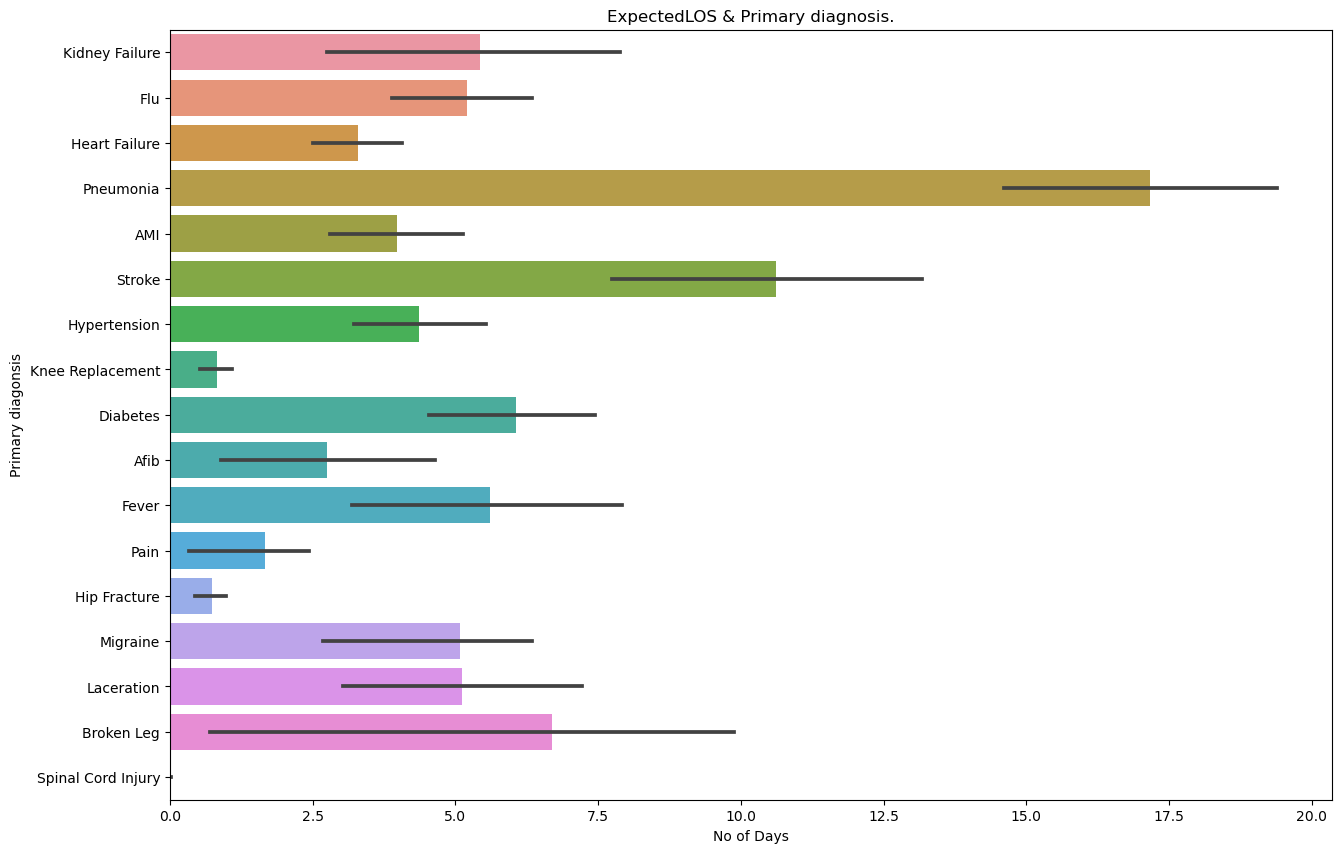

In [70]:
df=pd.read_excel('HospitalDatabase.xlsx', 'ReAdmissionRegistry')
df
 
plt.figure(figsize=(15,10))
ax =sns.barplot(data=df, x='ExpectedLOS', y='PrimaryDiagnosis', estimator=np.cov)
ax.set_title('ExpectedLOS & Primary diagnosis.')
ax.set_xlabel('No of Days')
ax.set_ylabel('Primary diagonsis')

### 8.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [182]:
ReasonForVisit = pd.merge(pats,EDVisits,on ='PatientID')

ReasonForVisit=ReasonForVisit[(ReasonForVisit.Acuity >= 2)&((ReasonForVisit.ReasonForVisit=='Migraine') | (ReasonForVisit.ReasonForVisit == 'Pneumonia'))]
ReasonForVisit[['PatientID','FirstName','LastName','DateOfBirth','Gender','Language','ReasonForVisit','Acuity']]


,PatientID,FirstName,LastName,DateOfBirth,Gender,Language,ReasonForVisit,Acuity
4,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,English,Migraine,3
18,7,Skipton,Bar,1975-11-25 22:23:53.525,Male,English,Migraine,2
20,8,Alexandra,Green,1967-06-16 16:37:21.694,Male,English,Migraine,2
24,10,Granny,Man,1969-09-15 11:20:42.218,Male,English,Migraine,2
27,12,Zonnya,Ab,1963-05-23 10:04:33.074,Male,Spanish,Migraine,2
...,...,...,...,...,...,...,...,...
1166,913,Alta,McGrath,1973-02-09 04:11:58.220,Female,English,Pneumonia,4
1168,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Female,English,Migraine,3
1169,916,Kaylil,Baldack,1966-11-17 14:10:35.224,Female,English,Pneumonia,4
1170,917,Velvet,Bushnell,1965-11-13 07:26:58.889,Female,English,Pneumonia,2


### 9.Using numpy functions, multiply the following arrays
## a=np.arange(6).reshape(2,3)
## b=np.arange(6).reshape(3,2)"

### 10.Display data by splitting age in 4 quartiles and labeling the quartiles.

### 11.Calculate average LOS.

In [183]:
AVg =(discharges['DischargeDate']-discharges['AdmissionDate']).dt.days.mean()
AVg

9.534722222222221

### 12.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [153]:
New_df = pd.DataFrame()
New_df['Date']=(re_adm['DischargeDate']).dt.date
New_df['Time']=(re_adm['DischargeDate']).dt.time
New_df



,Date,Time
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


### 13.Violin plot for Level of Acuity by Visit Reason

Text(0.5, 1.0, 'Level of Acuity by Visit Reason')

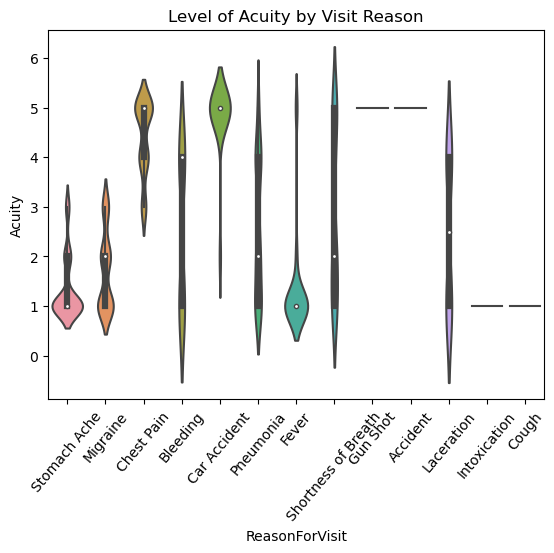

In [242]:
sns.violinplot(x ="ReasonForVisit",
             y ="Acuity",style ="event",
             data = EDVisits)
plt.xticks(rotation=50)
plt.title('Level of Acuity by Visit Reason')

### 14.Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

In [174]:
providers.groupby(['ProviderSpecialty'])['ProviderID'].count().reset_index(name='List_of_group')

,ProviderSpecialty,List_of_group
0,Cardiology,8
1,Pediatrics,9
2,PrimaryCare,16
3,Surgery,7


### 15.Count of canceled status.

In [179]:
amb_visits.query("VisitStatus == 'Canceled'").groupby(['VisitStatus'])['VisitID'].count().reset_index(name='Count of Canceled')


,VisitStatus,Count of Canceled
0,Canceled,60


### 16. Display total count of patients service wise based on gender.

In [178]:
service_provided = pd.merge(pats,discharges,on = 'PatientID')
service_provided =service_provided.groupby(['Gender','Service'])['PatientID'].count() 
service_provided

Gender  Service         
Female  Cardiology           41
        General Medicine    114
        Hospitalist          35
        ICU                  65
        Neurology            34
        Orthopeadics         22
Male    Cardiology           54
        General Medicine    149
        Hospitalist          66
        ICU                  86
        Neurology            31
        Orthopeadics         23
Name: PatientID, dtype: int64

### 17. Plot a graph to count the patients based on discharge disposition.

Text(0.5, 0, 'discharge disposition type')

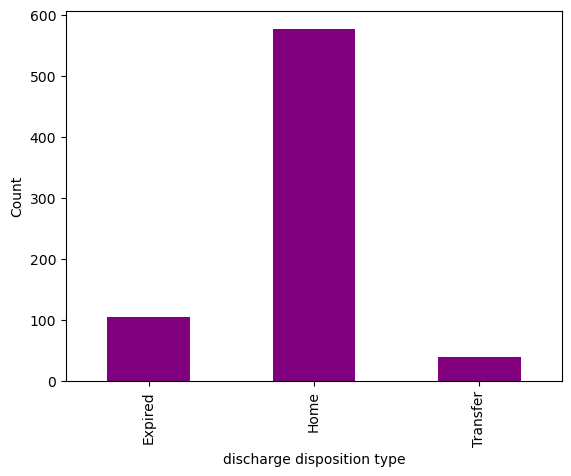

In [250]:
data = discharges.groupby(['DischargeDisposition'])['PatientID'].size()
data.plot(kind='bar',color = 'purple')
plt.ylabel("Count")
plt.xlabel("discharge disposition type")



### 18.Display the data where actual LOS is greater than expected LOS.

In [176]:
discharges["actual_los"] = (discharges["DischargeDate"]-discharges["AdmissionDate"]).dt.days
filtered_data=discharges.query("actual_los > ExpectedLOS.round()")
filtered_data[['PatientID','ExpectedLOS','actual_los','Service','DischargeDisposition']]

,PatientID,ExpectedLOS,actual_los,Service,DischargeDisposition
1,93,6.816558,12,Cardiology,Expired
4,103,2.639297,8,Cardiology,Expired
5,109,2.981758,15,Cardiology,Expired
6,115,4.959098,9,Cardiology,Expired
7,116,2.279624,12,Cardiology,Expired
...,...,...,...,...,...
712,703,3.539165,6,General Medicine,Transfer
713,708,4.518876,8,General Medicine,Transfer
714,713,8.542970,11,General Medicine,Transfer
715,716,11.362095,13,ICU,Transfer


### 19.Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [231]:

discharges.groupby(['DischargeDisposition','Service'])['actual_los'].mean()##.reset_index()


DischargeDisposition  Service         
Expired               Cardiology           8.866667
                      General Medicine     8.500000
                      Hospitalist         10.000000
                      ICU                  9.275862
                      Neurology           10.185185
                      Orthopeadics        11.800000
Home                  Cardiology          10.186667
                      General Medicine     9.772926
                      Hospitalist          9.034091
                      ICU                  9.127273
                      Neurology            9.194444
                      Orthopeadics         8.846154
Transfer              Cardiology          11.200000
                      General Medicine    10.687500
                      Hospitalist          8.666667
                      ICU                  8.833333
                      Neurology           12.000000
                      Orthopeadics        16.000000
Name: actual_los, dtype: 

### 20.Display using a donut chart the patient count in the ReAdmissionRegistry.

TypeError: object of type 'numpy.float32' has no len()

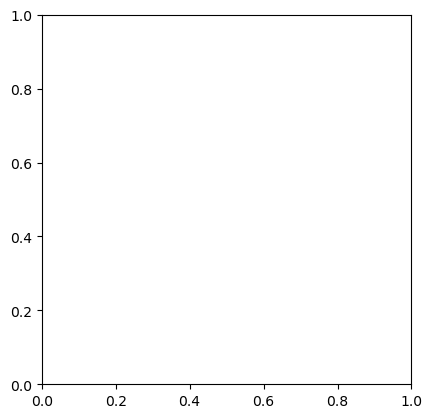

In [216]:
df = re_adm['PatientID'].count()
df
plt.pie(df)

# add a circle at the center to transform it in a donut chart+
#my_circle=plt.Circle( (0,0), 0.7, color='white')
#p=plt.gcf()
#p.gca().add_artist(my_circle)

plt.show()


In [217]:
import pygal
  

ModuleNotFoundError: No module named 'pygal'

TypeError: object of type 'numpy.float32' has no len()

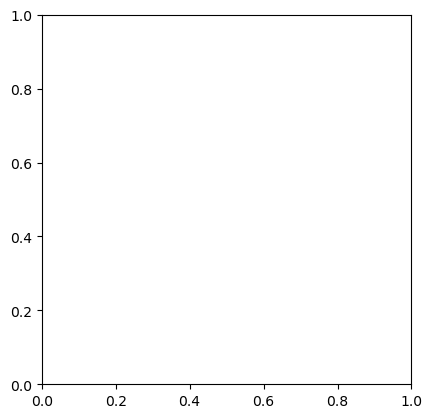

In [220]:
import matplotlib.pyplot as plt

# create data
df = re_adm['PatientID'].count()

# Create a pieplot
plt.pie(df)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

TypeError: object of type 'numpy.float32' has no len()

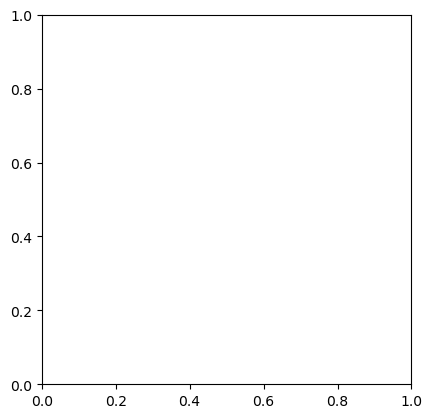

In [226]:
import matplotlib.pyplot as plt
 
 
# Setting size in Chart based on
# given values
#sizes = [100, 500, 70, 54, 440]

df = re_adm['PatientID'].count()
df
 
# Setting labels for items in Chart
#labels = ['Apple', 'Banana', 'Mango', 'Grapes',
          #'Orange']
 
# colors
colors = ['#FF0000']# '#0000FF', '#FFFF00', '#ADFF2F',
          #'#FFA500']
 
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
 
# Pie Chart
plt.pie(df, colors=colors,autopct='%1.1f%%', pctdistance=0.85, explode=explode)
                 # labels=labels,
        
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Favourite Fruit Survey')
 
# Add Legends
#plt.legend(labels, loc="upper right", title="Fruits Color")
 
# Displaying Chart
plt.show()